In [17]:
import sys
sys.path.append('./Utiles.py')
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import xarray as xr
import cmocean.cm as cmo 
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
import matplotlib as mpl
from scipy.spatial import Delaunay
from Utiles import area_weighted_average
import numpy as np

In [ ]:
path2 ='../../../automated_testing/integrated_tests/idealised/Thule/results_test_BMB_1/'
path1 ='../../../automated_testing/integrated_tests/idealised/Thule/results_test_BMB_2/'
path3 = '../../../automated_testing/integrated_tests/idealised/Thule/results_test_BMB_3/'
Quad2 = xr.open_dataset(path1 + 'main_output_ANT_00001.nc')
Quad1 = xr.open_dataset(path2 + 'main_output_ANT_00001.nc')
Quad3 = xr.open_dataset(path3 + 'main_output_ANT_00001.nc')

In [19]:
Hi1 = Quad1['Hi']
Hib = Quad1['Hib']
BMB1 = Quad1['BMB']
Va1 = Quad1['V']
V1 = Va1.T
Tria1 = Quad1['Tri'] - 1  
Tri1 = Tria1.T
triang1 = tri.Triangulation(V1[:, 0], V1[:, 1], Tri1)
distances1 = np.sqrt(V1[:, 0]**2 + V1[:, 1]**2)
mask_ocean1 = distances1 <= 750000


In [20]:
Hi2 = Quad2['Hi']
Hib2 = Quad2['Hib']
BMB2 = Quad2['BMB']
Va2 = Quad2['V']
V2 = Va2.T
Tria2 = Quad2['Tri'] - 1  
Tri2 = Tria2.T
triang2 = tri.Triangulation(V2[:, 0], V2[:, 1], Tri2)
distances2 = np.sqrt(V2[:, 0]**2 + V2[:, 1]**2)
mask_ocean2 = distances2 <= 750000

In [28]:
Hi3 = Quad3['Hi']
Hib3 = Quad3['Hib']
BMB3 = Quad3['BMB']
Va3 = Quad3['V']
V3 = Va3.T
Tria3 = Quad3['Tri'] - 1  
Tri3 = Tria3.T
triang3 = tri.Triangulation(V3[:, 0], V3[:, 1], Tri3)
distances3 = np.sqrt(V3[:, 0]**2 + V3[:, 1]**2)
mask_ocean3 = distances3 <= 750000

In [29]:
mask1 = Quad1['mask_grounded_ice']
mask2 = Quad2['mask_grounded_ice']
mask3 = Quad3['mask_grounded_ice']

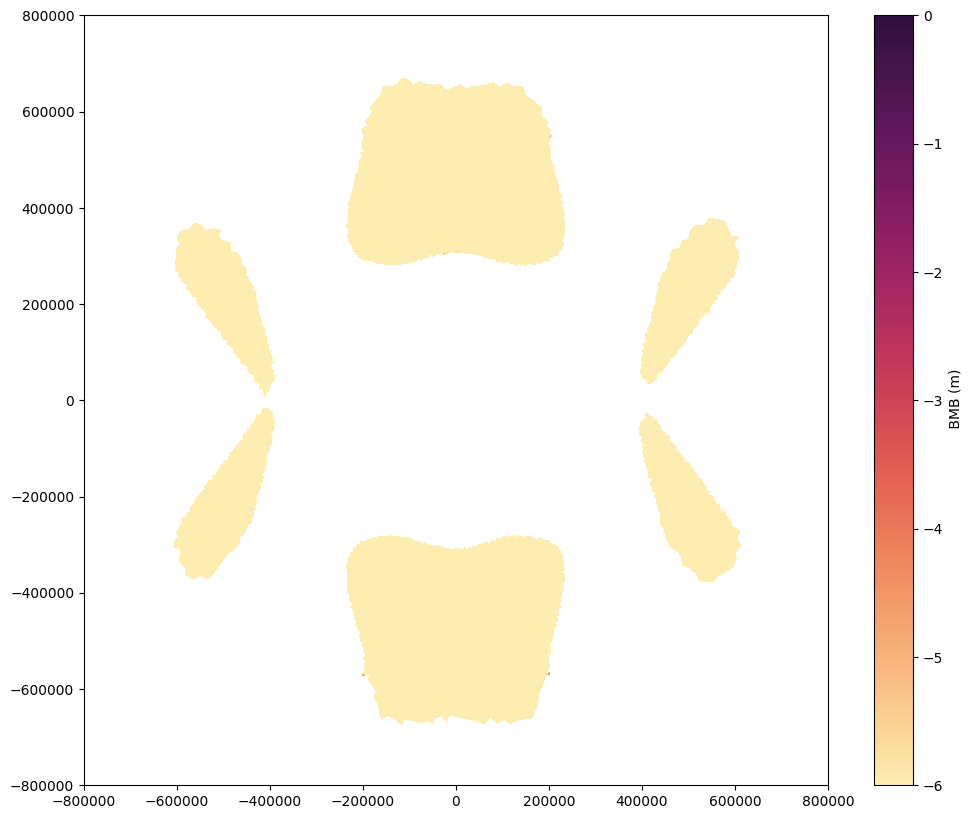

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
c0 = ax.tripcolor(triang1, BMB1[0].where(mask_ocean1 & (Hib[0]<-300) & ~mask1[0]), cmap=cmo.matter, vmin = -6, vmax = 0)
ax.set_xlim(-800000,800000)
ax.set_ylim(-800000,800000)
fig.colorbar(c0, ax=ax, label=" BMB (m)")

In [30]:
BMBtest = BMB1[0].where(mask_ocean1 & (Hib[0]<-300) & ~mask1[0])
BMBtest2 = BMB2[0].where(mask_ocean2 & (Hib2[0]<-300) & ~mask2[0])
BMBtest3 = BMB3[0].where(mask_ocean3 & (Hib3[0]<-300) & ~mask3[0])

In [ ]:
# Proper usage with your data:
V_array = np.asarray(V1)  # Ensure V is a numpy array
BMB_values = BMBtest.values.flatten()

BMB_mean = area_weighted_average(V_array, BMB_values)
print(f"Area-weighted average ice thickness for 1.2: {BMB_mean:.2f} m")

Area-weighted average ice thickness for 1.8: -13.34 m


In [ ]:
# Proper usage with your data:
V_array2 = np.asarray(V2)  # Ensure V is a numpy array
BMB_values2 = BMBtest2.values.flatten()

BMB_mean2 = area_weighted_average(V_array2, BMB_values2)
print(f"Area-weighted average ice thickness for 0.8 : {BMB_mean2:.2f} m")

Area-weighted average ice thickness for 1.2 : -8.94 m


In [31]:
# Proper usage with your data:
V_array3 = np.asarray(V3)  # Ensure V is a numpy array
BMB_values3 = BMBtest3.values.flatten()

BMB_mean3 = area_weighted_average(V_array3, BMB_values3)
print(f"Area-weighted average ice thickness for 4 : {BMB_mean3:.2f} m")

Area-weighted average ice thickness for 4 : -36.94 m


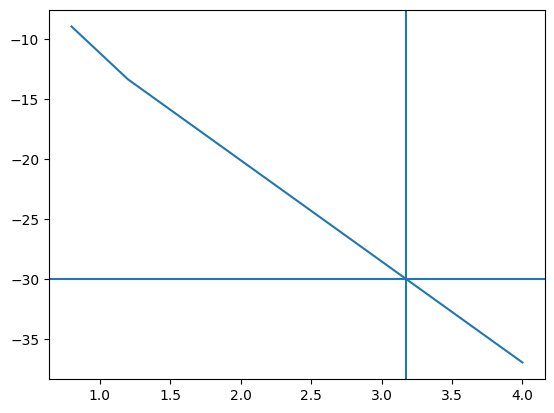

In [42]:
plt.plot([0.8,1.2,4],[BMB_mean2,BMB_mean,BMB_mean3])
plt.axhline(y=-30)
plt.axvline(x=3.175)